# Nenadgledano

Učenje funkcije koja opisuje "skrivenu" strukturu neobeleženih podataka, odnosno učenje reprezentacije podataka na osnovu primera *x* (nema *y*). Nenadgledano učenje može biti korisno za pronalaženje interesantnih veza među podacima. Ne postoji neki standardni način merenja performansi. Postupci se dele na:
* Klasterizacija/klasterovanje  - grupisanje podataka na osnovu sličnosti
* Redukcija dimenzionalnosti  - otkrivanje najdeskriptivnijih osobina podataka
* Asocijativna pravila  - pronalaženje uobičajenih kombinacija osobina podataka


![img/2/unsupervised-lr.jpg](img/2/unsupervised-lr.jpg)

# Klasterovanje

### 📚 Definicija

Klasterovanje je tip nenadgledanog učenja koji se koristi za grupisanje međusobno sličnih podataka.

Često se koristi za redukciju dimenzionalnosti i detekciju autlajera.

---

## K Means

Jedan od najčešće korišćenih algoritama za nenadgledano klasterovanje podataka. Preciznije, k-means je ne-hijerarhijska metoda grupisanja sličnih podataka. K-means je tehnika koja se često koristi u tzv. *eksplorativnoj analizi podataka*.

Klasterizacija je zadatak grupisanja skupa objekata, tako da su objekti koji su u istoj grupi (odnosno *klasteru*) sličniji (u nekom smislu) jedni drugima, više nego što su slični objektima u drugim grupama (klasterima).

⚙️ Pseudo-kod:

```
za svaku grupu inicijalizovati nasumično centar
dok se centri ne prestanu kretati ili ne dostigne max broj iteracija:
    pridruži svaki element grupi sa njemu najbližim centrom grupe
    pomeri centar svih grupa na osnovu novih elemenata
```

![img/2/kmeans.gif](img/2/kmeans.gif)

Za računanje distance se najčešće koristi euklidsko rastojanje.

Kako se centri inicijalizuju nasumično, K-means je stohastički algoritam.

---

#### Određivanje optimalnog K

Kako znati unapred koliko ima klastera?

Lako je videti kada su podaci dvodimenzionalni, jer ih je onda lako i vizualizovati, ali često podaci imaju (mnogo) više od samo 2 dimenzije - ovo je tzv. "kletva dimenzionalnosti" (*eng. curse of dimensionality*) u mašinskom učenju.

Određivanje optimalnog K (tj. broja klastera) je nešto se dosta proučavalo, a mi ćemo koristi tzv. "metodu lakta" (*eng. elbow method*). Za određen broj K (npr. 2, 4, 6, 8, ..., 20) se vrši klasterizacija i zatim se računa suma kvadratnih grešaka (SSE). SSE se računa tako što se unutar svakog klastera sumiraju kvadrati udaljenosti podataka od centra klastera, i zatim se sve to opet sumira. Matematički:

$ SSE = \sum_{i=1}^{K} \sum_{x \in c_{i}} dist(x, c_{i})^{2} $, gde je *dist* euklidska udaljnost.

Zatim se za sve plotuje SSE u odnosu na K, npr.:

![img/2/sse.png](img/2/sse.png)

---

#### Prednosti K-means

* Jednostavan i lako razumljiv
* Laka implementacija
* Relativno dobre performanse (za malo K)
* Odličan kada su klasteri sferičnog/globularnog oblika (malo formalnije hiper-sferičnog, za sfere u >3 dimenzija)

#### Mane K-means
* Potrebno unapred znati K (što je nekad teško odrediti)
* Nije deterministički - pošto se centri inicijalizuju nasumično, nekad se dobijaju drugačiji rezultati
* Osetljiv na šum
* Kada podaci nisu globularnog oblika -> beskoristan (pogledati donju sliku)
* Nema mogućnost hijerarhijskog klasterovanja (razlikovanje više manjih podklastera unutar većeg klastera)

![img/2/kmeans_fail.png](img/2/kmeans_fail.png)

---

## DBSCAN

DBSCAN (Density-based spatial clustering of applications with noise) je takođe algoritam za klasterizaciju podataka. Ovaj postupak se zasniva na ideji grupisanja tačaka (podataka) na osnovu njihove međusobne udaljenosti. Ukoliko se tačke nalaze u tzv. *epsilon okolini* one su deo nekog klastera, u suprotnom se posmatraju kao šum.

⚙️ Opis DBSCAN algoritma:
1. Neka postoji neki skup tačaka (podataka) koje želimo da klasterizujemo. U samom postupku, razlikuju se tri vrste tačaka: ključne tačke, dostupne tačke i šum.
2. DBSCAN zahteva dva parametra: *epsilon* (eps) i *minimalni broj potrebnih tačaka koje čine region* (minPts). Epsilon okolina se najčešće računa korišćenjem euklidske udaljenosti.
3. Algoritam počinje sa proizvoljnom tačkom. Računa se epsilon okolina te tačke, i ukoliko se u njoj nalazi dovoljno tačaka (minPts), započinje se novi klaster. U suprotnom, tačka se računa kao šum. Obratiti pažnju da tačka, iako je šum, kasnije *može* biti pronađena kao deo neke druge epsilon okoline sa dovoljno tačaka i samim tim da postane deo klastera.
4. Ukoliko je za tačku određeno da pripada klasteru, sve tačke u njenoj epsilon okolini takođe pripadaju tom klasteru. Dakle, sve tačke koje su pronađene u epsilon okolini trenutne tačke se dodaju u klaster, kao i tačke koje se nalaze u epsilon okolini tih tačaka (rekurzivno). Proces se nastavlja dok se ne nađe ceo klaster, odnosno dok se ne obiđu sve tačke u epsilon okolinama.
5. Onda se nalazi nova, prozivoljna neposećena tačka, za koju se ponavlja čitav postupak, što dovodi do otkrivanja ili novog klastera ili šuma.

![img/2/dbscan.png](img/2/dbscan.png)

---

Hajde da vidimo rezultat DB scan-a naspram KMeans, na sintetički generisanom skupu:



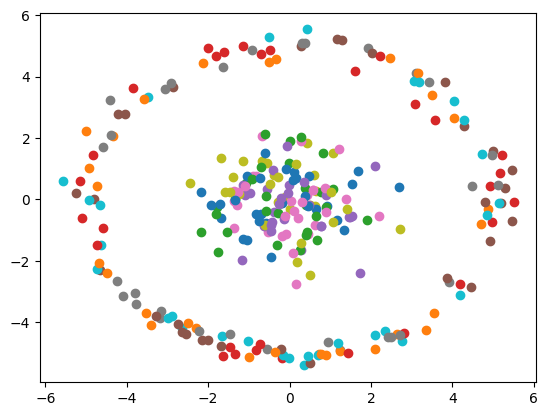

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1337)

n = 150

s1 = np.ndarray(shape=(n, 2))
s2 = np.ndarray(shape=(n, 4))

data = []  # ovde se nalaze podaci, u vidu liste tacaka sa (x,y) koordinatama

plt.figure()

for i in range(n):
    x1, y1 = np.random.normal(), np.random.normal()
    s1[i] = (x1, y1)

    r2, theta2 = np.random.normal(5, 0.25), np.random.uniform(0, 2*np.pi)
    x2, y2 = r2 * np.cos(theta2), r2 * np.sin(theta2)
    s2[i] = (x2, y2, r2, theta2)

    plt.scatter(x1, y1)
    plt.scatter(x2, y2)

    data.append((x1, y1))
    data.append((x2, y2))

plt.show()

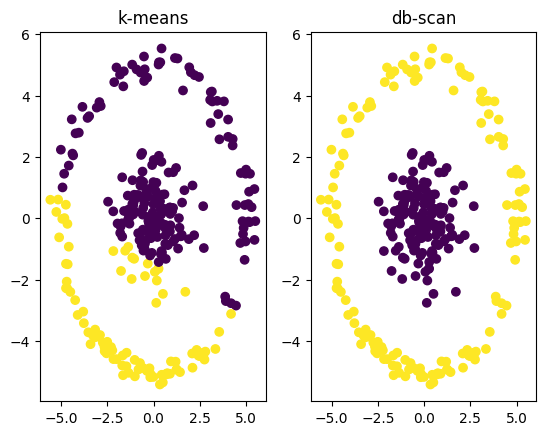

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels_kmeans = kmeans.labels_


dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan.fit(data)
labels_dbscan = dbscan.labels_

x_scatter = [point[0] for point in data]
y_scatter = [point[1] for point in data]

plt.figure()
plt.subplot(1, 2, 1)
plt.scatter(x_scatter, y_scatter, c=labels_kmeans)
plt.title('k-means')

plt.subplot(1, 2, 2)
plt.scatter(x_scatter, y_scatter, c=labels_dbscan)
plt.title('db-scan')
plt.show()


#### Prednosti DBSCAN

* Nije potrebno unapred znati broj klastera (kao kod K-means)
* Klasteri mogu biti proizvoljnog oblika
* Ume da tretira šum
* Parametre epsilon i minPts je lako menjati u cilju dobijanja klastera različitih veličina i oblika, i ove parametre često podešavaju eksperti sa domenskim znanjem


#### Mane DBSCAN

* Kvalitet rezultata zavisi od toga čime se meri epsilon. Obično je to euklidska udaljenost, ali za višedimenzionalne podatke potrebne su drugačije metrike
* Kada postoje varijacije u gustini klastera, nemoguće je odrediti epsilon i minPts da odgovara svim klasterima
* U slučaju kada ne postoji ekspert sa domenskim znanjem, određivanje epsilon i minPts parametara je često dosta teško

---

# Redukcija dimenzionalnosti


### 🌟 Analogija   

Gledanje filma u 720p umesto 4K – manje detalja, ali suština ostaje

### 📚 Definciija

Redukcija dimenzionalnosti je proces smanjenja broja varijabli (osobina) u skupu podataka, pri čemu se pokušava očuvati što više relevantnih informacija. Može se ostvariti metodama selekcije osobina (zadržavanje najvažnijih originalnih osobina) ili ekstrakcije osobina (kreiranje novih, reprezentativnih osobina).

## PCA

Principal Component Analysis (PCA) je tehnika koja se koristi za redukciju dimenzionalnosti podataka. Njena osnovna ideja je da pronađe nove osobine podataka (tzv. glavne komponente) koje sadrže što više informacije iz originalnih osobina, ali sa smanjenom dimenzionalnošću.

Zašto je korisno?
1. Ubrzava algoritme i smanjuje memorijske resurse
2. Olakšava vizuelizaciju (npr. 3D → 2D)
3. Smanjuje šum

![img/2/pca.gif](img/2/pca.gif)

---

### ⚙️ Kako funkcioniše PCA?

PCA funkcioniše tako što projektuje podatke u novu koordinatnu ravan, pri čemu se bira pravac najveće varijanse podataka. To se radi kroz sledeće korake:

1. Standardizacija podataka – podatke treba normalizovati kako bi svi atributi imali isti značaj (npr. skalirati ih da imaju srednju vrednost 0 i standardnu devijaciju 1).
2. Proračun kovarijacione matrice – određuje se kako su varijable međusobno povezane.
3. Proračun sopstvenih vrednosti i sopstvenih vektora – sopstveni vektori predstavljaju pravce glavnih komponenti, dok sopstvene vrednosti određuju značaj tih pravaca.
4. Odabir glavnih komponenti – bira se određen broj komponenti koje objašnjavaju najveći deo varijanse podataka.

Transformacija podataka – originalni podaci se projektuju na nove glavne komponente.

---

#####Prednosti PCA

* Smanjuje dimenzionalnost podataka, čime se poboljšavaju performanse
algoritama i smanjuje problem „kletve dimenzionalnosti”.
* Čuva što je više moguće informacije iz originalnih podataka uz minimalan gubitak.
* Ubrzava treniranje modela jer smanjuje broj osobina.
* Koristi se za vizualizaciju podataka (PCA može projicirati visoko-dimenzionalne podatke u 2D ili 3D prostor za lakšu interpretaciju).
* Otkriva latentne strukture u podacima, omogućavajući bolju interpretaciju.

##### Mane PCA

* Može izgubiti važne informacije, posebno ako se izabere premali broj komponenti.
* Nije idealan za nelinearne odnose – PCA bazira transformaciju na linearnim kombinacijama osobina.
* Osetljiv na skaliranje podataka – loše skalirani podaci mogu dovesti do loših rezultata.
* Teže interpretirati nove glavne komponente – one često nemaju očigledno značenje u odnosu na originalne osobine.

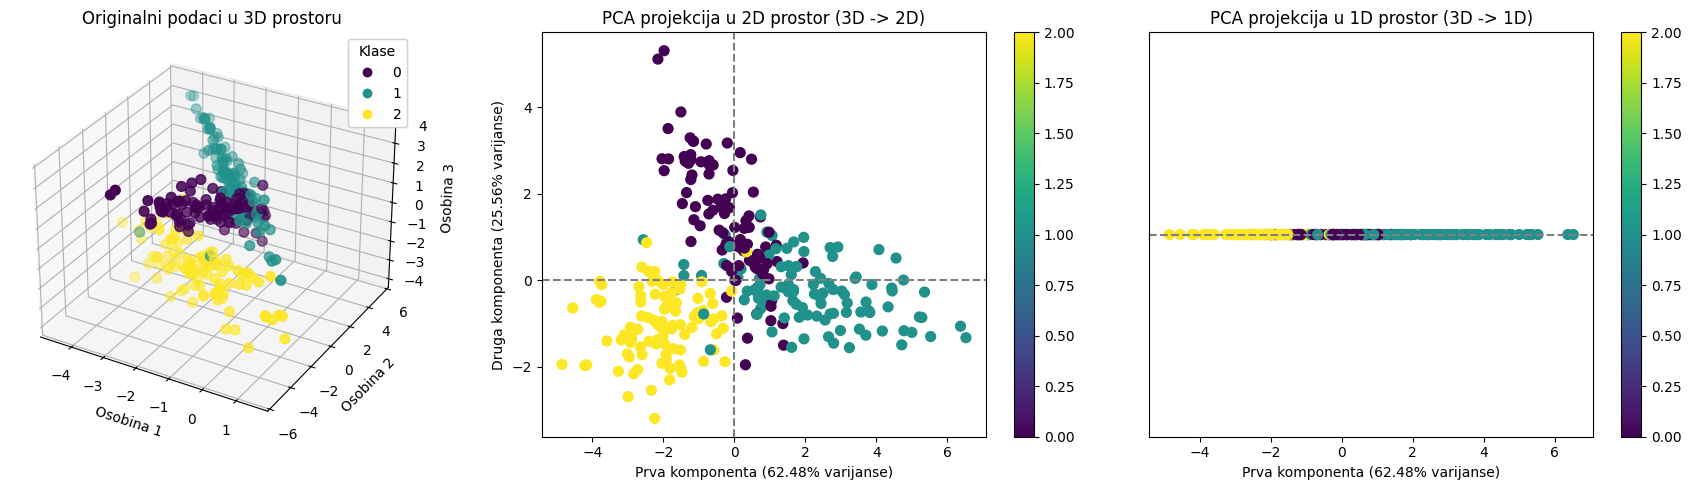

PCA (3D → 2D):
 - Prva komponenta objašnjava 62.48% varijanse
 - Druga komponenta objašnjava 25.56% varijanse

PCA (3D → 1D):
 - Prva komponenta objašnjava 62.48% varijanse


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generisani sinteticki podaci
np.random.seed(42)
X, y = make_classification(
    n_samples=300, n_features=3, n_classes=3, n_clusters_per_class=1, n_redundant=0, n_informative=3,
    class_sep=1.5, random_state=42
)

# Originalni podaci u 3D
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(131, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Klase")
ax.add_artist(legend1)
ax.set_title('Originalni podaci u 3D prostoru')
ax.set_xlabel('Osobina 1')
ax.set_ylabel('Osobina 2')
ax.set_zlabel('Osobina 3')

# PCA na 3D → 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)
explained_variance_2d = pca_2d.explained_variance_ratio_

plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', s=50)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.colorbar(scatter)
plt.title('PCA projekcija u 2D prostor (3D -> 2D)')
plt.xlabel(f'Prva komponenta ({explained_variance_2d[0]*100:.2f}% varijanse)')
plt.ylabel(f'Druga komponenta ({explained_variance_2d[1]*100:.2f}% varijanse)')

# PCA na 3D → 1D
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X)
explained_variance_1d = pca_1d.explained_variance_ratio_

plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca_1d[:, 0], np.zeros_like(X_pca_1d), c=y, cmap='viridis', s=50)
plt.axhline(0, color='gray', linestyle='--')
plt.colorbar(scatter)
plt.title('PCA projekcija u 1D prostor (3D -> 1D)')
plt.xlabel(f'Prva komponenta ({explained_variance_1d[0]*100:.2f}% varijanse)')
plt.yticks([])

plt.tight_layout()
plt.show()

# Objašnjena varijansa
print(f'PCA (3D → 2D):')
print(f' - Prva komponenta objašnjava {explained_variance_2d[0]*100:.2f}% varijanse')
print(f' - Druga komponenta objašnjava {explained_variance_2d[1]*100:.2f}% varijanse')

print(f'\nPCA (3D → 1D):')
print(f' - Prva komponenta objašnjava {explained_variance_1d[0]*100:.2f}% varijanse')
